# Breast Cancer Wisconsin
We will be working on the Breast Cancer Wisconsin (Diagnostic) Data Set from UCI Machine Learning Repository. Each instance belongs to one of 2 possible classes: (2) benign or (4) malignant. 

In [1]:
# Import Dependencies

%matplotlib inline
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#load the dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

names = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
         'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin',
         'Normal Nucleoli','Mitoses','Class']

dataset = read_csv(url, names=names)

In [3]:
#Inspect
print(dataset.shape)
print(dataset.head(10))

(699, 11)
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   
5             1017122                8                       10   
6             1018099                1                        1   
7             1018561                2                        1   
8             1033078                2                        1   
9             1033078                4                        2   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2              

In [4]:
#Summary Statistics
print(dataset.describe())

       Sample code number  Clump Thickness  Uniformity of Cell Size  \
count        6.990000e+02       699.000000               699.000000   
mean         1.071704e+06         4.417740                 3.134478   
std          6.170957e+05         2.815741                 3.051459   
min          6.163400e+04         1.000000                 1.000000   
25%          8.706885e+05         2.000000                 1.000000   
50%          1.171710e+06         4.000000                 1.000000   
75%          1.238298e+06         6.000000                 5.000000   
max          1.345435e+07        10.000000                10.000000   

       Uniformity of Cell Shape  Marginal Adhesion  \
count                699.000000         699.000000   
mean                   3.207439           2.806867   
std                    2.971913           2.855379   
min                    1.000000           1.000000   
25%                    1.000000           1.000000   
50%                    1.000000     

#### Missing Values

There are 16 instances that contain a single missing  (i.e., unavailable) attribute value, now denoted by "?".  


In [5]:
dataset.dtypes

Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [6]:
present = dataset['Bare Nuclei'] != '?'

In [7]:
present.head()

0    True
1    True
2    True
3    True
4    True
Name: Bare Nuclei, dtype: bool

In [8]:
#Remove '?'
df = dataset[present] 
print(len(dataset))
print(len(df))

699
683


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [10]:
#Convert all variables to int
df.astype('int64').dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

#### Target Variable

In [11]:
#Target variable distribution
print(df.groupby('Class').size())

Class
2    444
4    239
dtype: int64


In [13]:
df.Class = df.Class.astype(str)
df.Class = df.Class.astype('category')

#### Train & Test set

In [15]:
# Split-out validation dataset
array = df.values
#Omit 'Sample code number' attribute
X = array[:,1:10]
y = array[:,10]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=123)

#### Build Models

In [16]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.965253 (0.025012)
LDA: 0.954209 (0.022038)
KNN: 0.974411 (0.014564)
CART: 0.944983 (0.021861)
NB: 0.956061 (0.021974)
SVM: 0.959731 (0.024439)
GBM: 0.970741 (0.016629)
RF: 0.972492 (0.016930)


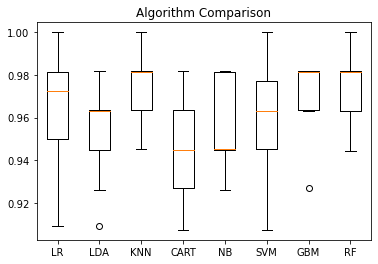

In [17]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### Predict on Test Set

In [18]:
#Implement the best model (knn)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, Y_train)
pred = knn_model.predict(X_test)

In [19]:
# Evaluate predictions
print(accuracy_score(Y_test, pred))
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

0.9854014598540146
[[88  2]
 [ 0 47]]
              precision    recall  f1-score   support

           2       1.00      0.98      0.99        90
           4       0.96      1.00      0.98        47

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137

